# Figure 4.15, 4.16, and 4.17

Oscillatory network.

In [1]:
using DifferentialEquations
using ModelingToolkit
using Plots
using LinearAlgebra
Plots.gr(lw=2)

Plots.GRBackend()

In [2]:
hill(x, k) = x / (x + k)
hill(x, k, n) = hill(x^n, k^n)

hill (generic function with 2 methods)

In [3]:
# Model of oscillatory network from Figure 4.14. This code generates Figures 4.15, 4.16, and 4.17
@parameters k_0 k_1 k_2 n
@variables t A(t) B(t)
D = Differential(t)

(::Differential) (generic function with 2 methods)

In [4]:
eqs = [D(A) ~ k_0 - k_1 * A * ( 1 + B^n),
       D(B) ~ k_1 * A * ( 1 + B^n) - k_2 * B]

# Secure positions of state variable and parameters 
@named sys = ODESystem(eqs, t, [A, B], [k_0, k_1, k_2, n])

Model sys with 2 equations
States (2):
  A(t)
  B(t)
Parameters (4):
  k_0
  k_1
  k_2
  n

In [5]:
rhs = [x.rhs for x in collect(eqs)]
oop, iip = eval.(ModelingToolkit.build_function(rhs, [A, B], [k_0, k_1, k_2, n], t))

(var"#3#4"(), var"#5#6"())

In [6]:
function figure0415(; param = (K0 = 8.0, K1 = 1.0, K2 = 5.0, N = 2),
	                  r = LinRange(0.0, 4.0, 20),
	                  tend = 8.0,
	                  figtitle="Fig 4.15")

	u0s = ( [A=>1.5, B=>1.0], [A=>0.0, B=>1.0],
        	[A=>0.0, B=>3.0], [A=>2.0, B=>0.0])

	sols = map(u0s) do u0
		prob = ODEProblem(sys, u0, tend, (k_0=>param.K0, k_1=>param.K1, k_2=>param.K2, n=>param.N))
		sol = solve(prob)
	end

	# Fig 4.15 A
	p1 = plot(sols[1], xlabel="Time", ylabel="Concentration", title ="$figtitle (A)", xlims=(0.0, 8.0))
	
	# Fig 4.15 B: Vetor field
	function ∂F(x, y; scale=20)
		dxdy = oop([x, y], values(param), 0)
		return dxdy ./ (hypot(x, y)^0.5 * scale)
	end
	
	nullcline_s1(s2, p=param) = (p.K0 / p.K1) * hill(1, s2, p.N)
	nullcline_s2(s2, p=param) = (p.K2 * s2) / (p.K1 * (1 + s2^p.N))
	
	
	xx = [x for y in r, x in r]
	yy = [y for y in r, x in r]
	p2 = quiver(xx, yy, quiver=∂F, line=(:lightblue))

	for sol in sols
		plot!(p2, sol, vars=(1, 2), label=nothing)
	end
	
	rMin, rMax = r[1], r[end]
	
	plot!(p2, nullcline_s1, identity, rMin, rMax, label="Nullcline A", line=(:dash, :red))
	plot!(p2, nullcline_s2, identity, rMin, rMax, label="Nullcline B", line=(:dash, :blue))
	plot!(p2, title = "$figtitle (B)", xlabel="[A]", ylabel="[B]", 
      xlims=(rMin, rMax), ylims=(rMin, rMax), aspect_ratio=:equal, size=(700, 700))
	
	return (p1, p2)
end

figure0415 (generic function with 1 method)

In [7]:
fig415a, fig415b = figure0415()

(Plot{Plots.GRBackend() n=2}, Plot{Plots.GRBackend() n=26})

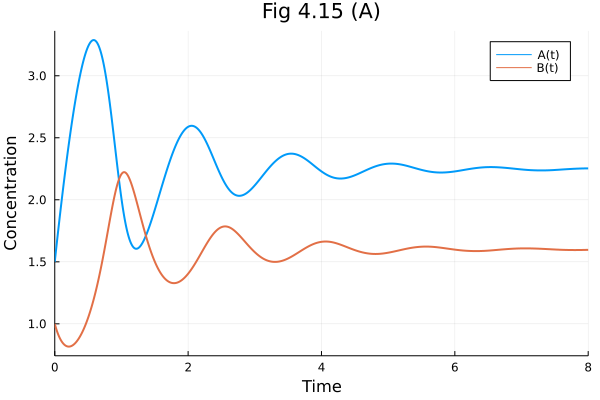

In [8]:
fig415a

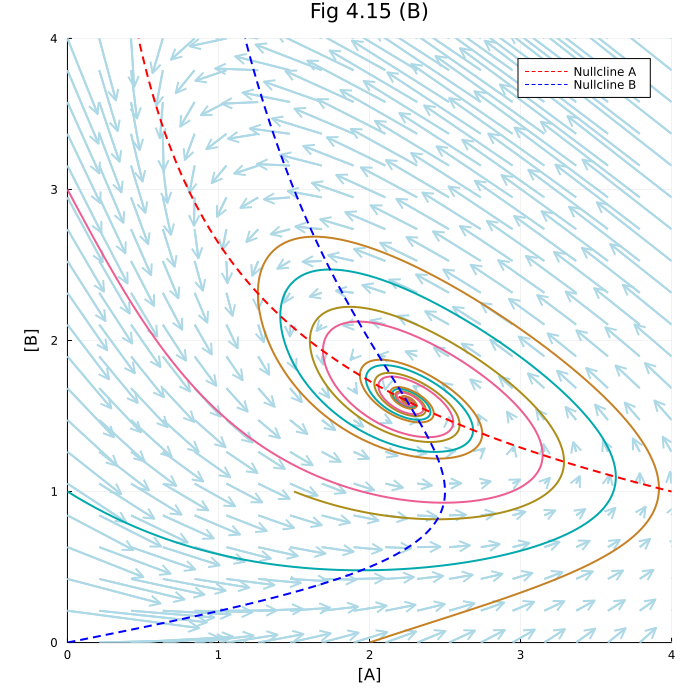

In [9]:
fig415b

In [10]:
fig416a, fig416b = figure0415(param = (K0 = 8.0, K1 = 1.0, K2 = 5.0, N = 2.5), tend = 1000.0, figtitle="Fig 4.16")

(Plot{Plots.GRBackend() n=2}, Plot{Plots.GRBackend() n=26})

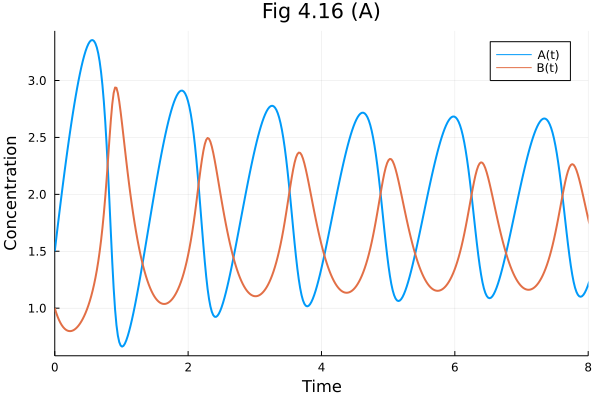

In [11]:
fig416a

In [12]:
fig416b

In [13]:
prob = ODEProblem(sys, [A=>2.0, B=>1.5], 10.0, (k_0=>8, k_1=>1, k_2=>5, n=>2.5))

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: 2-element Vector{Float64}:
 2.0
 1.5

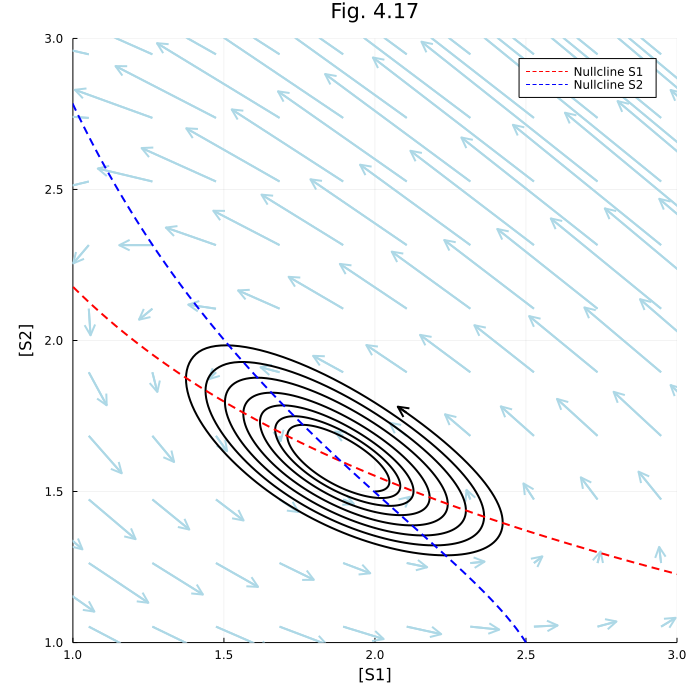

In [14]:
param = (K0 = 8.0, K1 = 1.0, K2 = 5.0, N = 2.5)

sol417 = solve(ODEProblem(sys, [A=>2.0, B=>1.5], 10.0, (k_0=>param.K0, k_1=>param.K1, k_2=>param.K2, n=>param.N)))

r = LinRange(0.0, 4.0, 20)
xx = [x for y in r, x in r]
yy = [y for y in r, x in r]

"Vetor field"
function ∂F(x, y; scale=20)
    dxdy = oop([x, y], values(param), 0)
    return dxdy ./ (hypot(x, y)^0.5 * scale)
end

nullcline_s1(s2, p=param) = (p.K0 / p.K1) * hill(1, s2, p.N)
nullcline_s2(s2, p=param) = (p.K2 * s2) / (p.K1 * (1 + s2^p.N))

xx = [x for y in r, x in r]
yy = [y for y in r, x in r]

quiver(xx, yy, quiver=∂F, line=(:lightblue))
plot!(sol417, vars=(1, 2), label=nothing, line=(:black), arrow=0.4)


plot!(nullcline_s1, identity, 0.0, 4.0, label="Nullcline S1", line=(:dash, :red))
plot!(nullcline_s2, identity, 0.0, 4.0, label="Nullcline S2", line=(:dash, :blue))
plot!(title = "Fig. 4.17", xlabel="[S1]", ylabel="[S2]", 
      xlims=(1.0, 3.0), ylims=(1.0, 3.0), aspect_ratio=:equal, size=(700, 700))